In [1]:
from datasets import load_from_disk
import glob
from bertopic.representation import KeyBERTInspired, VisualRepresentation
from bertopic.backend import MultiModalBackend
from bertopic import BERTopic
import csv

C:\Users\braes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\braes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\braes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [6]:
def get_image_paths(folder_path):
    jpg_files = glob.glob(f"{folder_path}/*.jpg")
    png_files = glob.glob(f"{folder_path}/*.png")
    image_paths = jpg_files + png_files
    return image_paths

image_paths = get_image_paths('twitter_BC_AB_wildfires_apr-jun2023_5,478(images)')

In [7]:
# Image embedding model
embedding_model = MultiModalBackend('clip-ViT-B-32', batch_size=32)

# Image to text representation model
representation_model = {
    "Visual_Aspect": VisualRepresentation(image_to_text_model="nlpconnect/vit-gpt2-image-captioning")
}

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [8]:
# Train our model with images only
topic_model = BERTopic(
    embedding_model=embedding_model, 
    representation_model=representation_model, 
    calculate_probabilities = True,
    nr_topics = 35)
topics, probs = topic_model.fit_transform(documents=None, images=image_paths)

100%|██████████| 35/35 [00:07<00:00,  4.62it/s]


In [9]:
topic_model.save("twitter_BC_AB_wildfires_apr-jun2023_5,478(image_captioning)", serialization="safetensors")

In [12]:
topic_model = BERTopic.load('twitter_BC_AB_wildfires_apr-jun2023_5,478(image_captioning)')

,Topic,Count,Representation,Visual_Aspect
0,-1,9,"[sky, tree, few, cloudy, trees, background, jetliner, couple, clouds, field]",
1,0,117,"[smoke, out, coming, road, street, sky, with, field, forest, hydrant]",
2,1,45,"[photos, showing, series, collage, penguin, of, types, snow, person, painting]",
3,2,36,"[sunset, tree, view, light, leaves, river, range, with, mountain, day]",
4,3,36,"[picture, train, trees, bunch, white, shirt, stop, blue, sign, war]",
5,4,36,"[painting, flying, colorful, water, body, bird, of, kite, blue, bunch]",
6,5,27,"[sticks, fire, car, floor, bunch, window, black, it, rug, food]",
7,6,27,"[cartoon, character, collage, photos, of, variety, animals, plant, penguin, movie]",
8,7,18,"[suit, sign, parking, clock, that, says, woman, don, no, man]",
9,8,18,"[attached, pole, crane, to, truck, parked, power, is, line, side]",

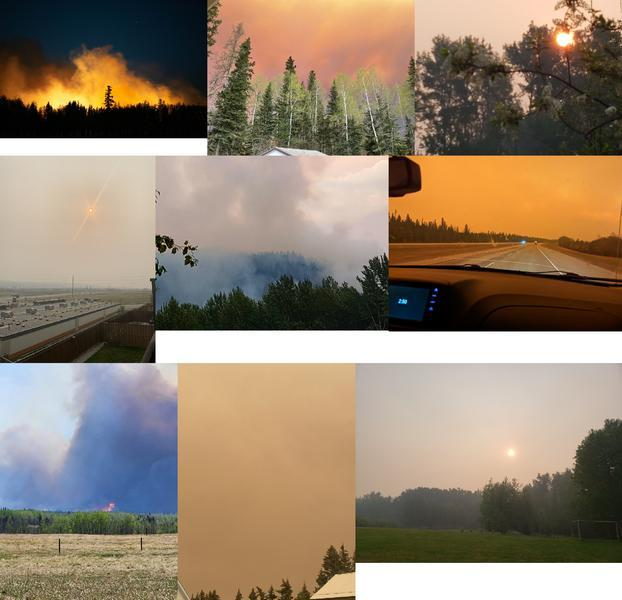
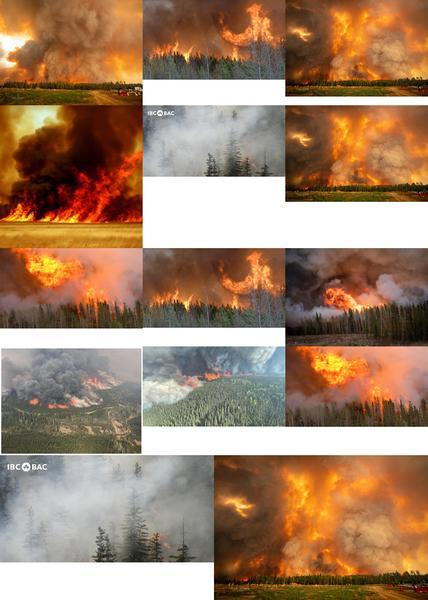
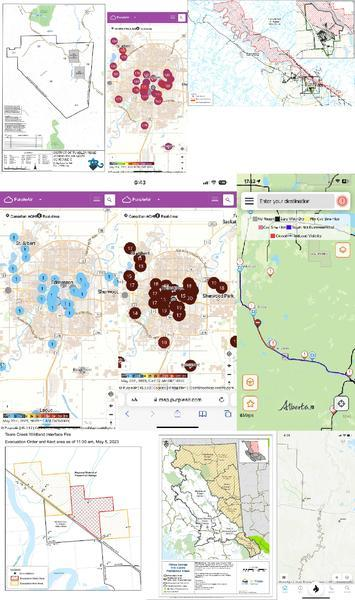
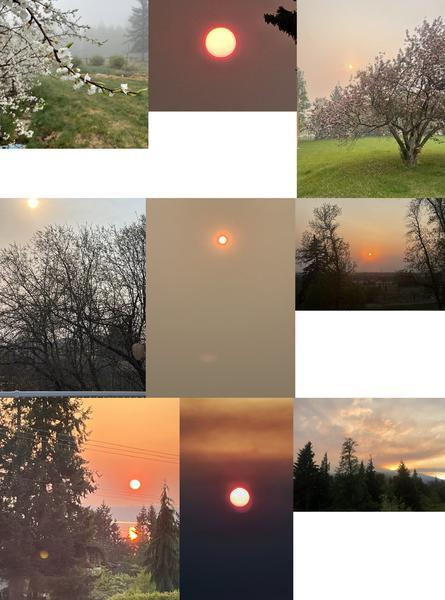
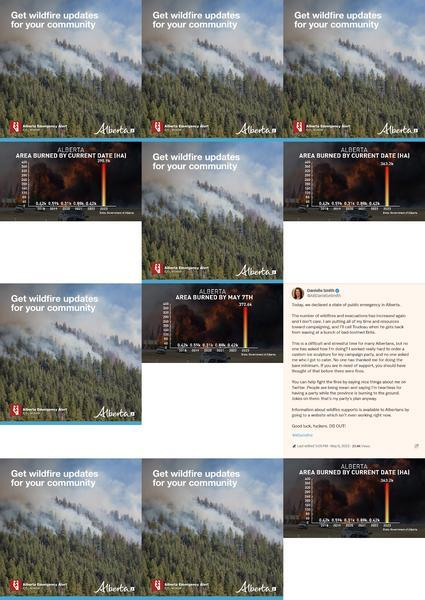
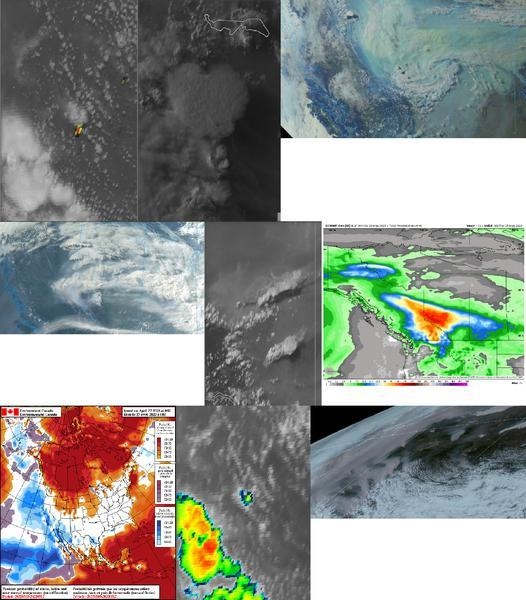
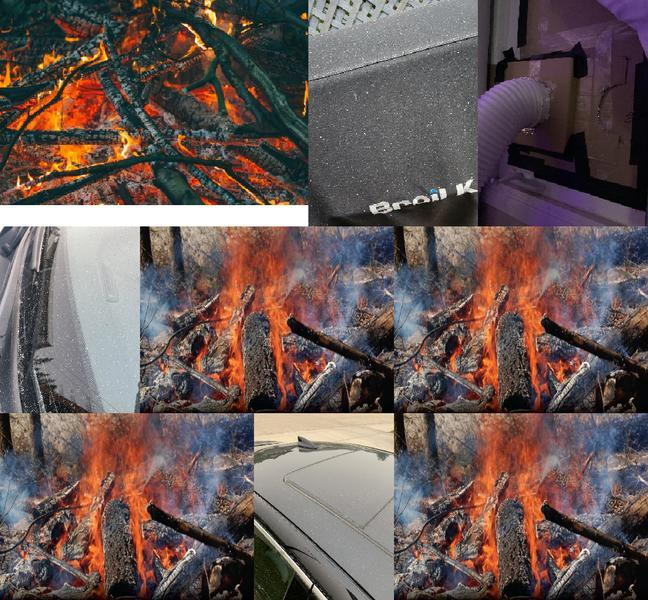
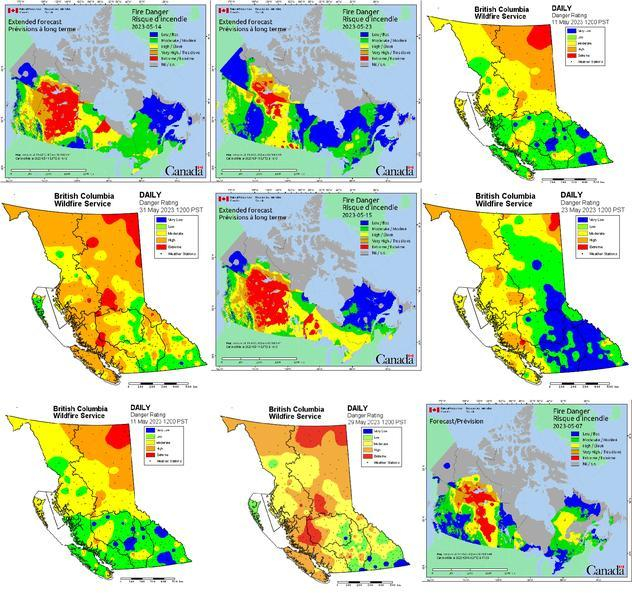
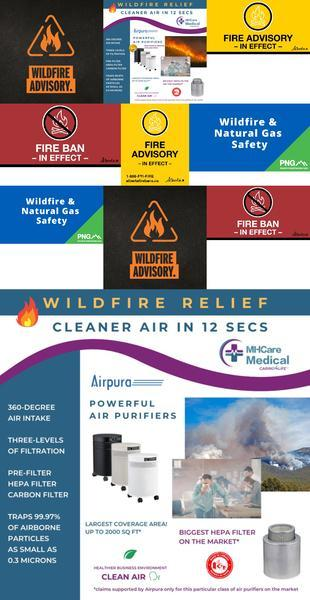
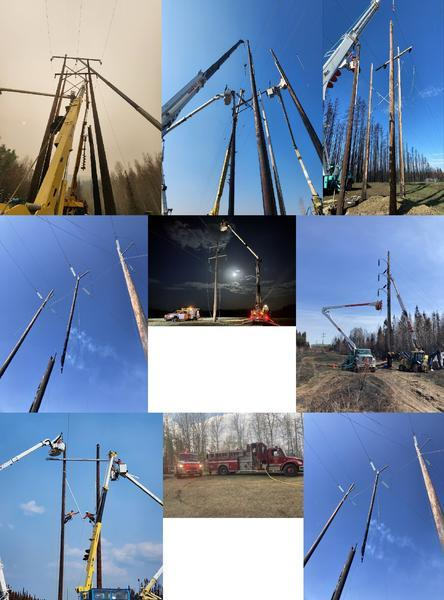
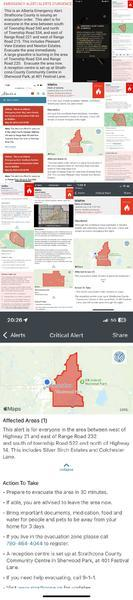
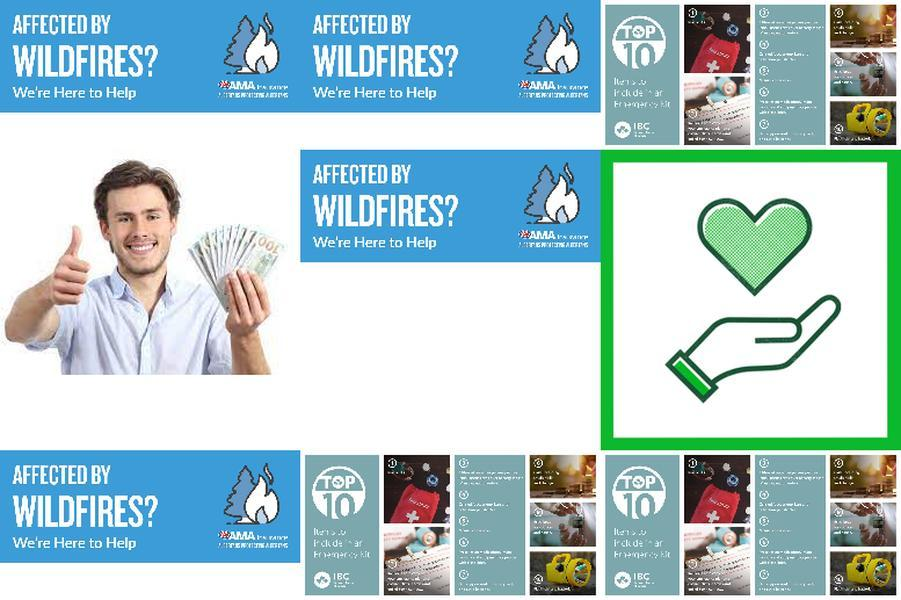
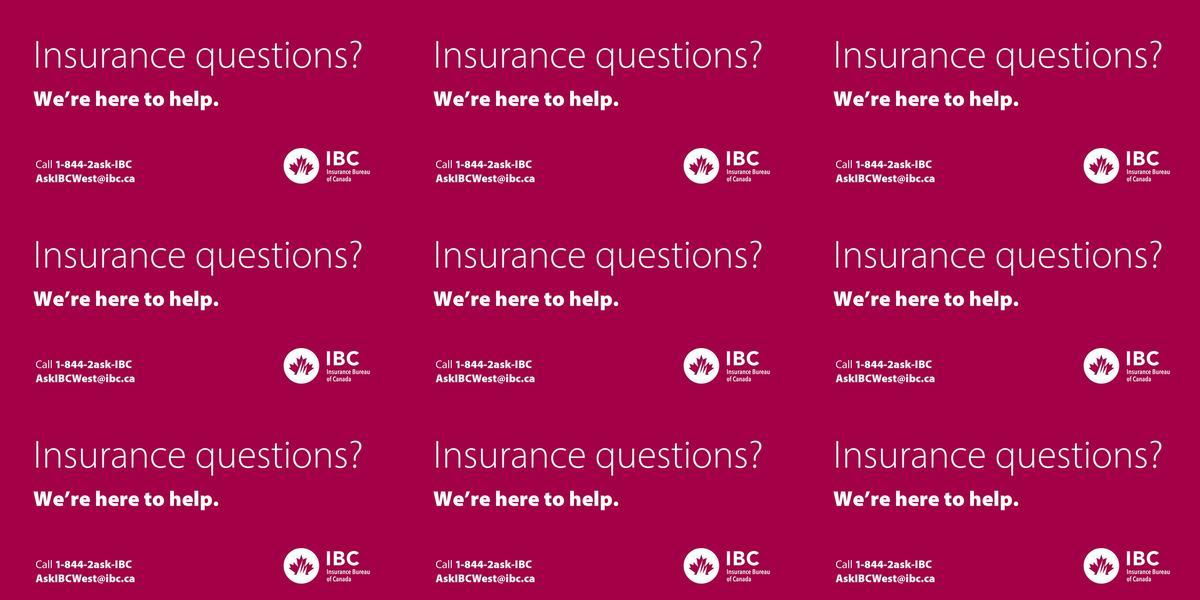
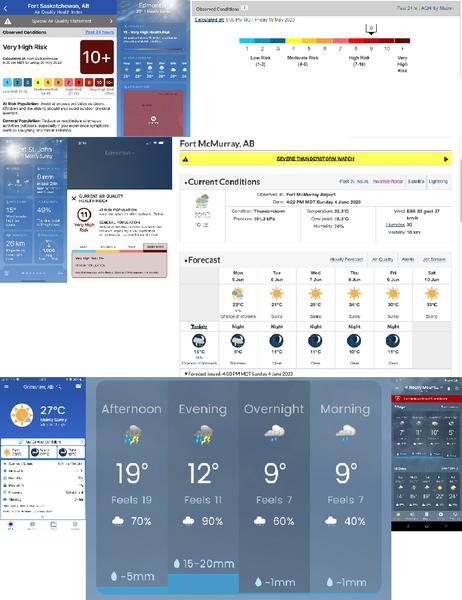
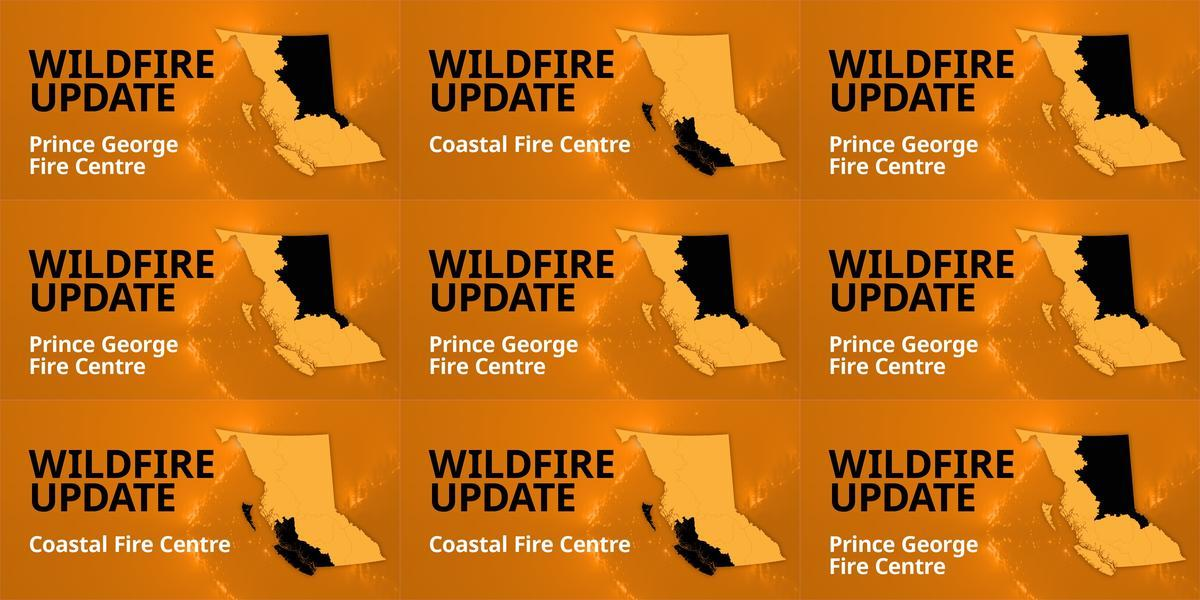
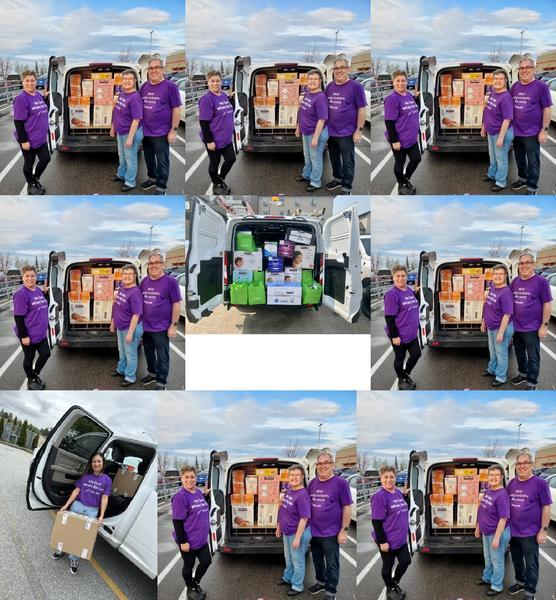
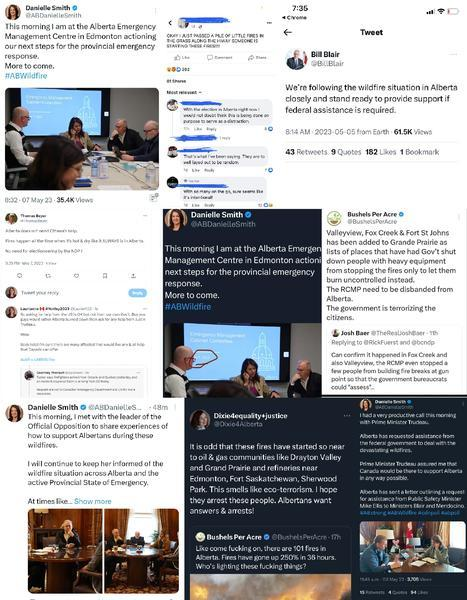
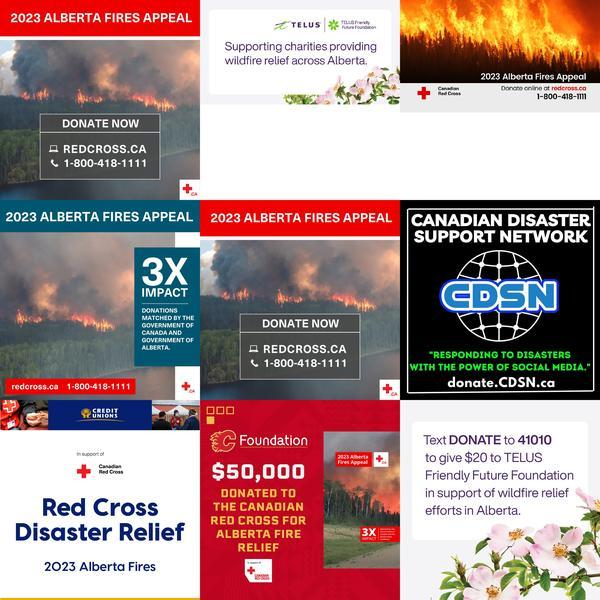
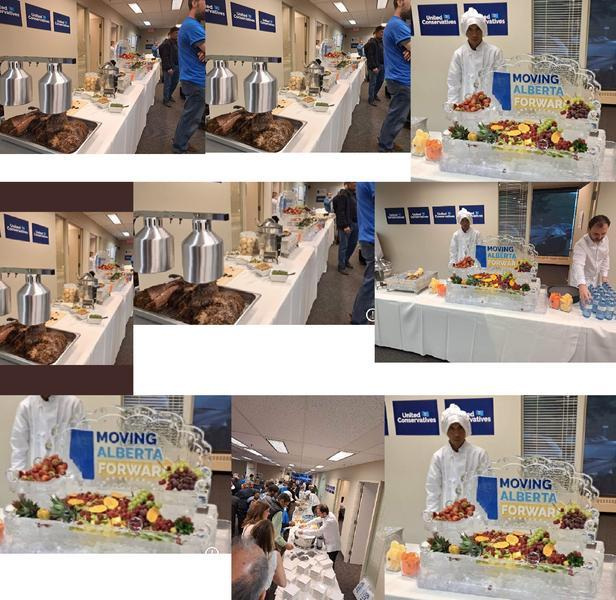
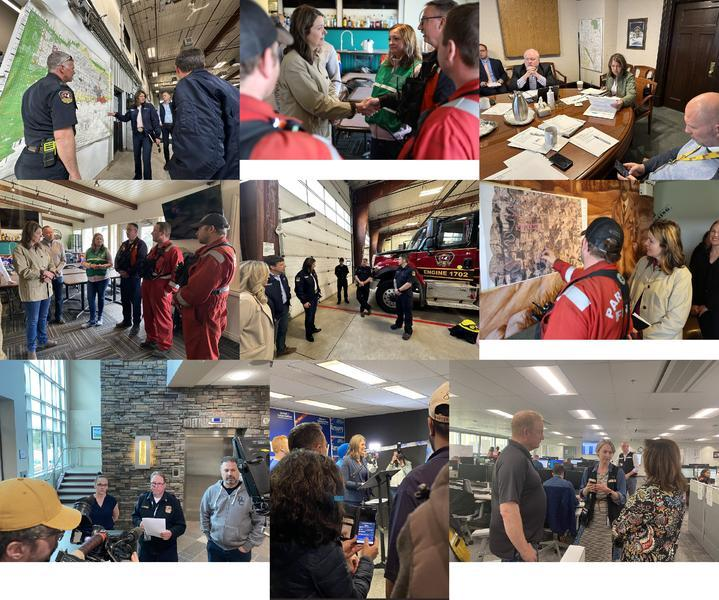
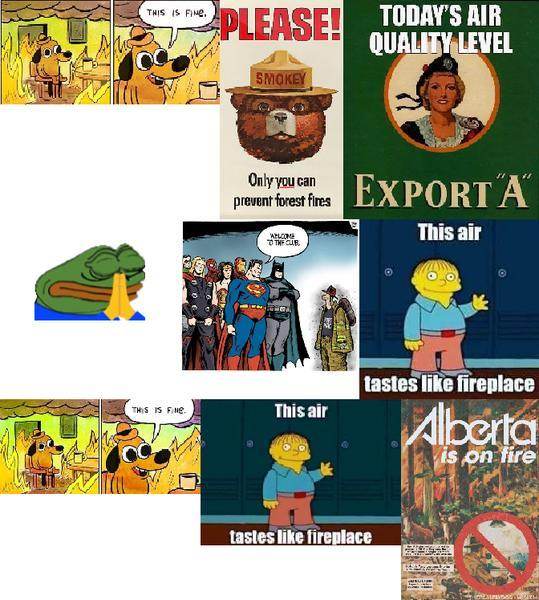
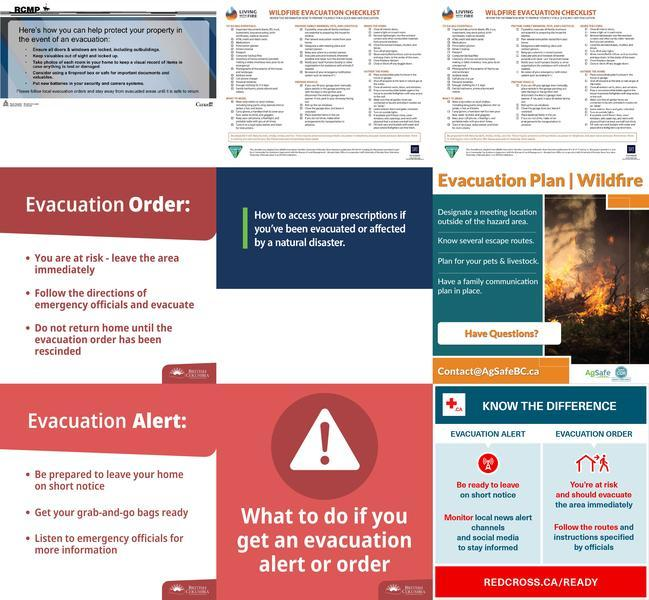
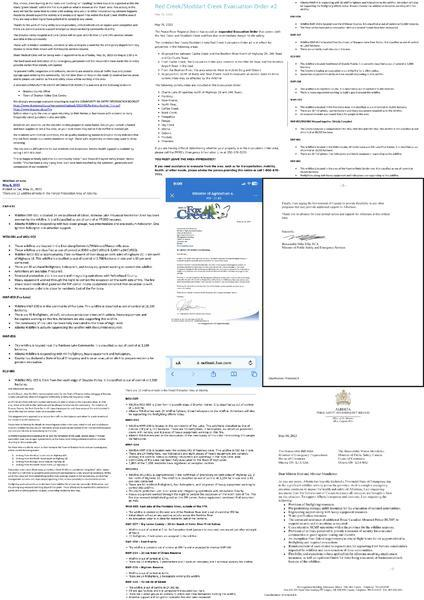
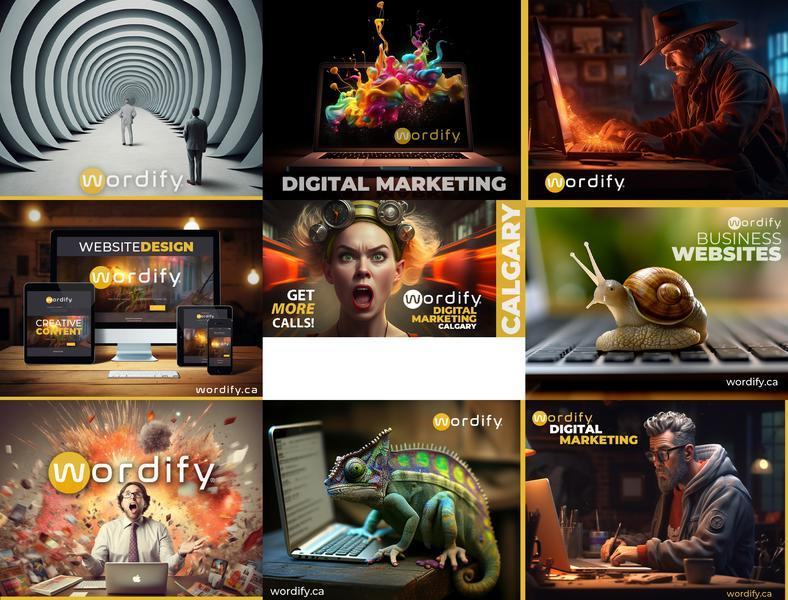
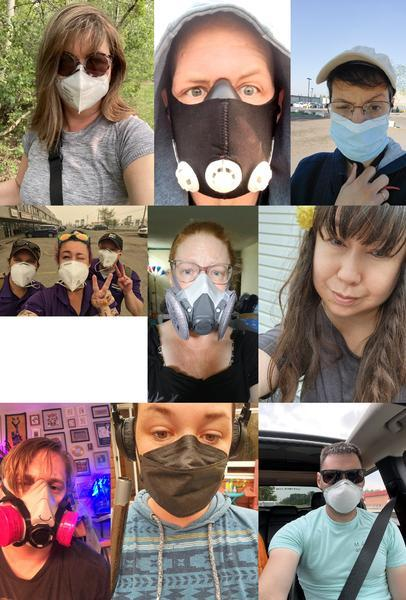
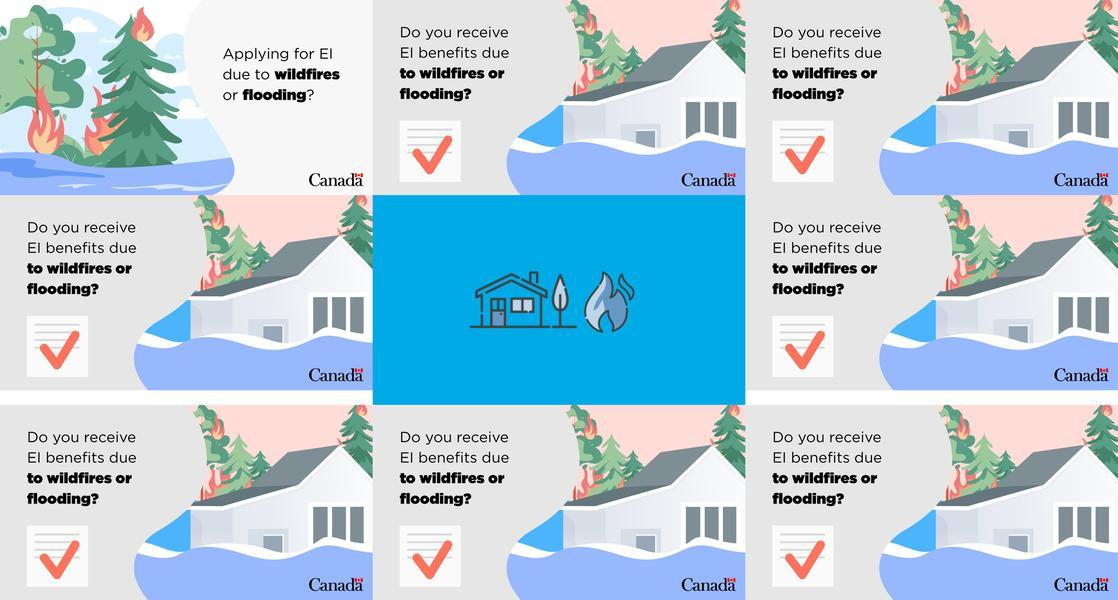
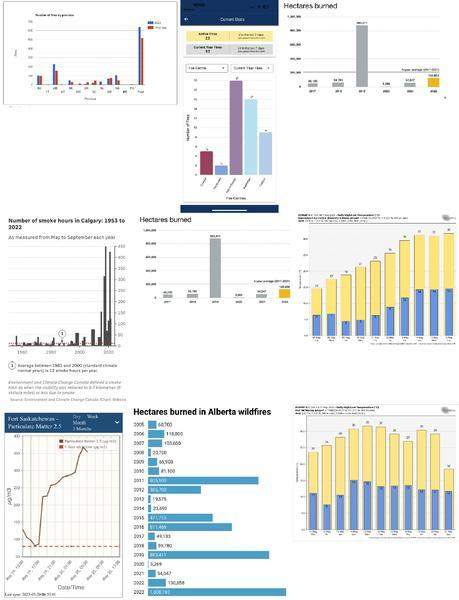
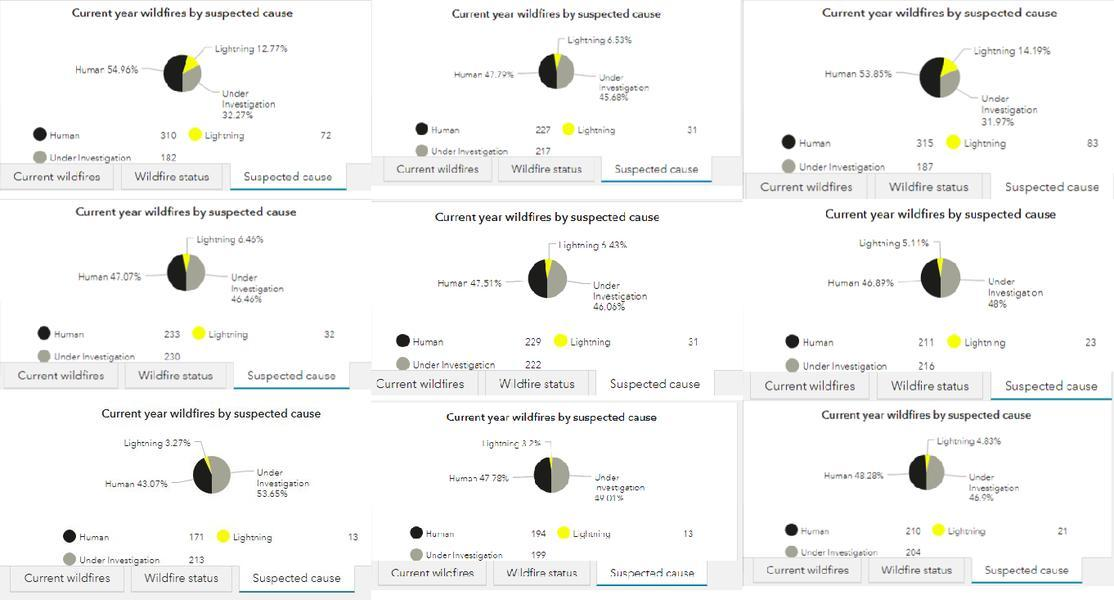
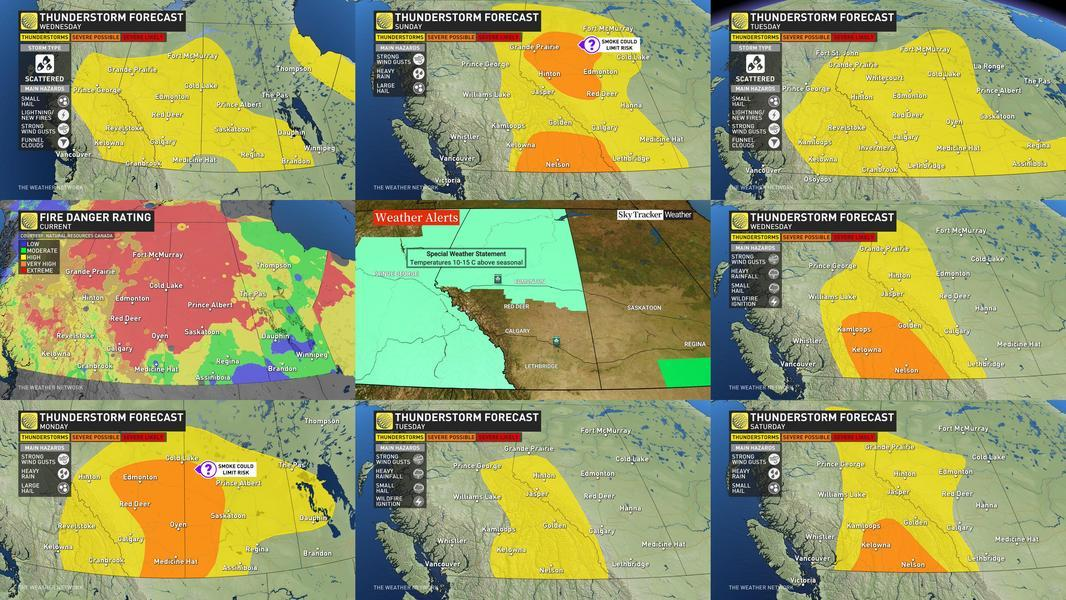
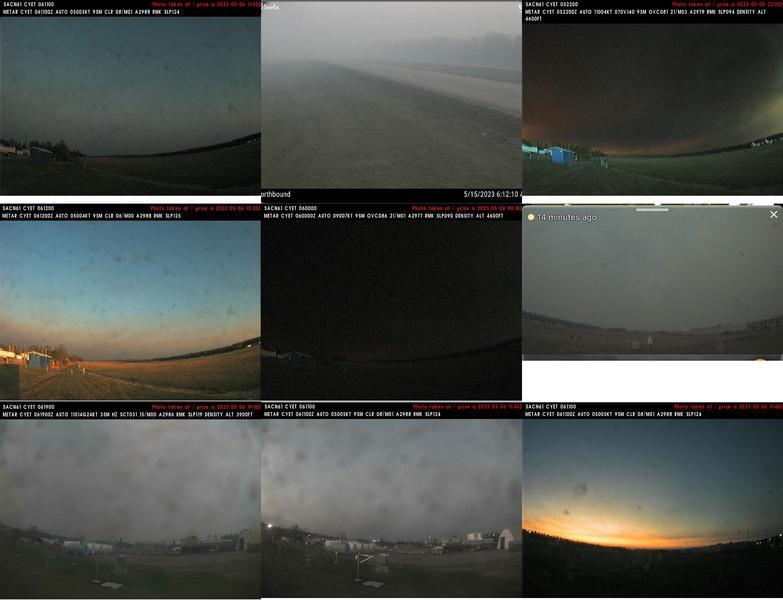
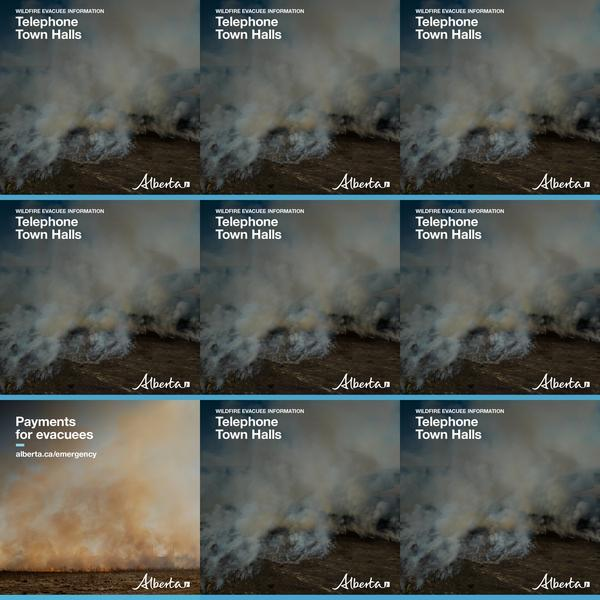
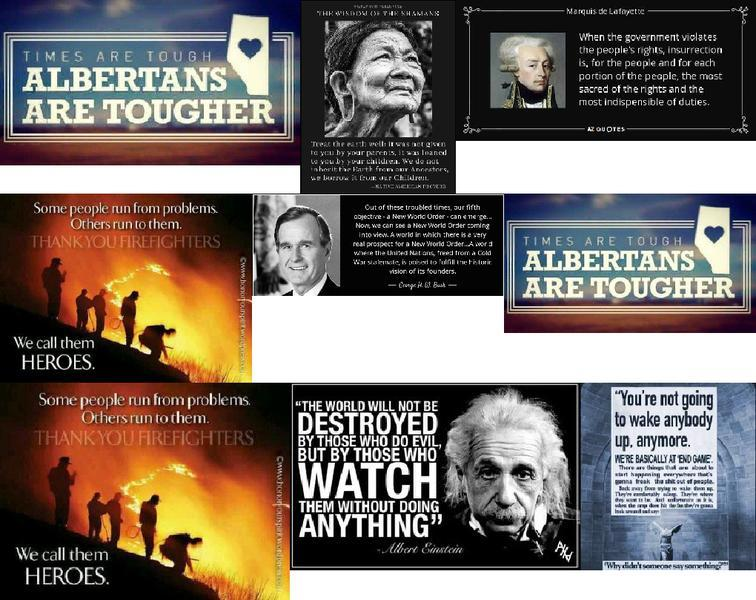
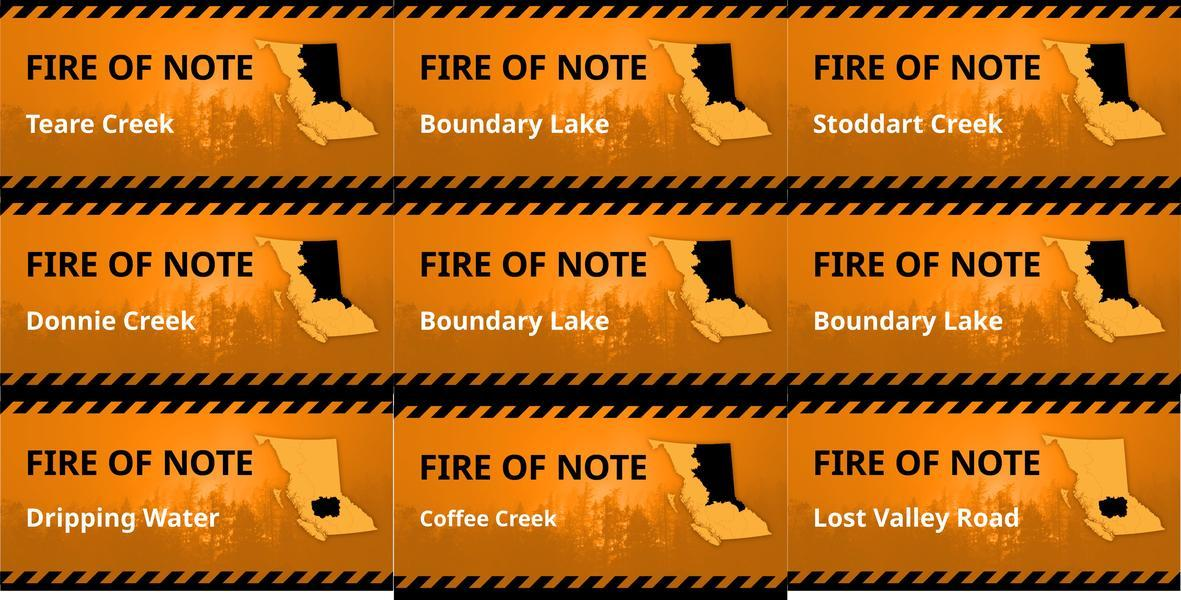
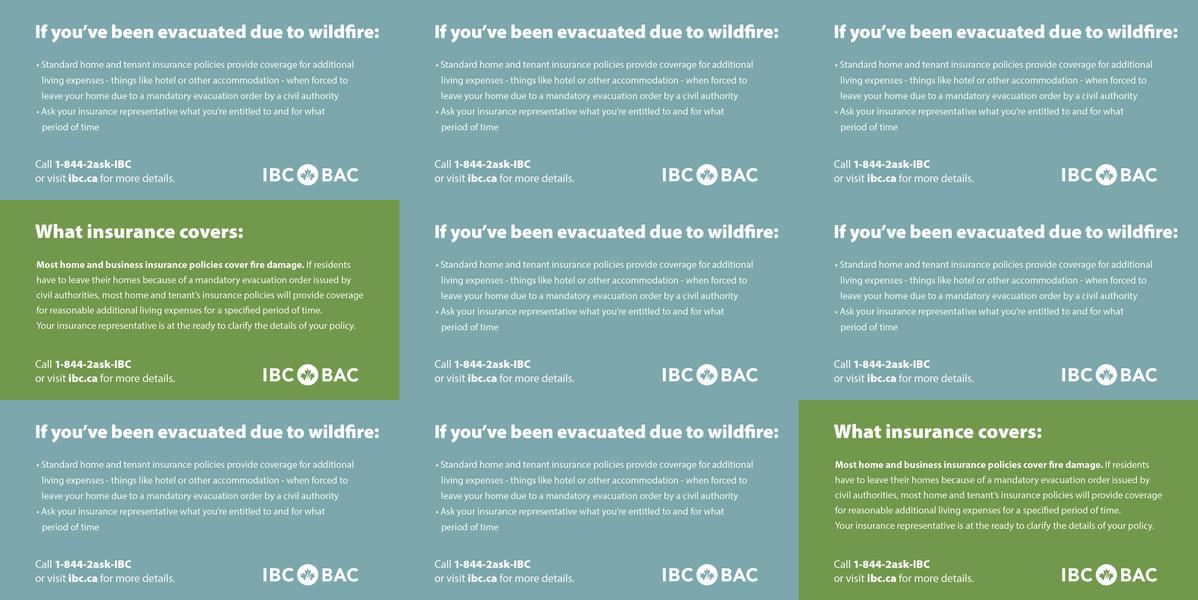
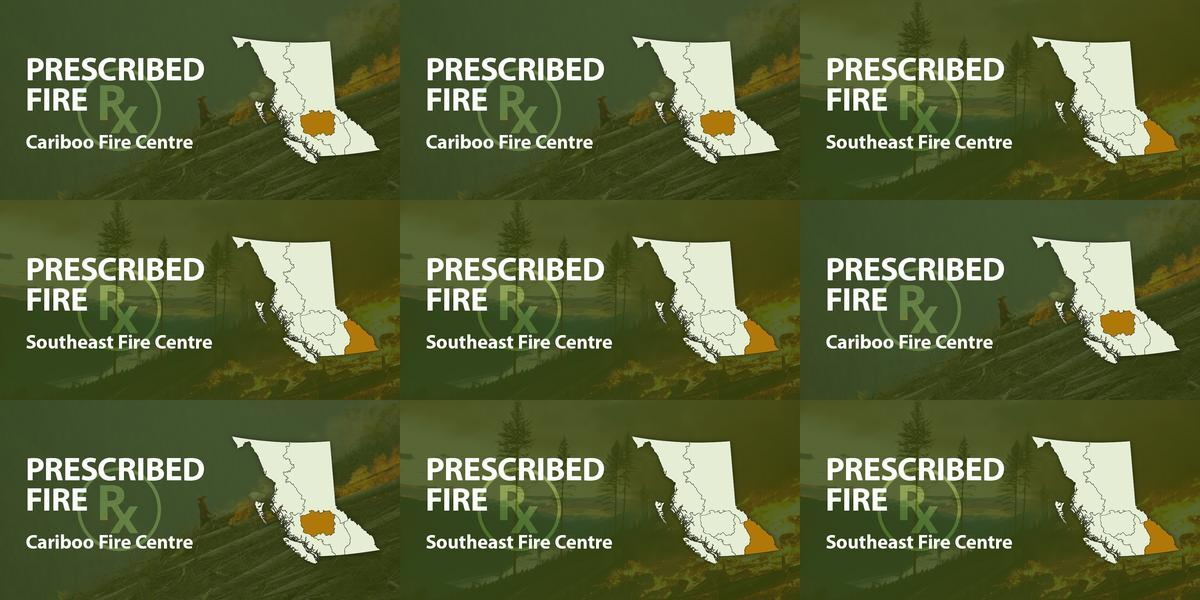

In [26]:
import base64
from io import BytesIO
from IPython.display import HTML
from PIL import Image

def get_thumbnail(image_path, size=(100, 100)):
    try:
        im = Image.open(image_path)
        im.thumbnail(size)
        return im
    except Exception as e:
        print(f"Error generating thumbnail: {str(e)}")
        return None

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

# Extract dataframe
df = topic_model.get_topic_info().drop("Representative_Docs", 1).drop("Name", 1)

# Visualize the images
HTML(df.to_html(formatters={'Visual_Aspect': image_formatter}, escape=False))

In [17]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topic_info()

In [ ]:
representations = topic_model.get_document_info(docs).get("Representation")

In [24]:
yop = topic_model.get_topic_info().get("Representation")
yop.to_csv("name.csv", index=False)